# Lab 1: Introduction to OpenCV

The goal of this first lab is to present a small introduction to image processing using OpenCV. In each section, you can find:
* a small example - analyse the code and try it
* some exercises

In [1]:
# Requirements for this tutorial
! pip install opencv-python
! pip install numpy
! pip install matplotlib


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# If you prefer, you can convert this notebook to a Python script by uncommenting the following command
! pip install nbconvert
! jupyter nbconvert --to script 01-introduction.ipynb


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
[NbConvertApp] Converting notebook 01-introduction.ipynb to script
[NbConvertApp] Writing 10990 bytes to 01-introduction.py


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

dataDir = '../images/'

A reference table with some useful functions:

| Function | Description |
| ------------- | ------------- |
| **Low-level NumPy** | |
| `x = np.array(list)` | Converts Python list to `ndarray` |
| `x = np.zeros((80, 80, 3))` | Create an array 80x80x3 of zeros (i.e., a black image). |
| `x = np.ones((80, 80, 3))` | Same with ones. |
| `x = np.random.rand((80, 80, 3))` | Same but each value is a uniform sample from [0,1]. |
| `x = np.random.randn((80, 80, 3))` | Same but each value is a Gaussian sample from N(0,1). |
| `print(x.shape)` | Print the shape of the `ndarray`. |
| **Arithmetic** | |
| `x[:, :, 0]` | Access the first slice of the third-axis (i.e., if `x` is an image with format BGR, this would be the blue channel. |
| `x += 50` | Adds 50 to all pixels. |
| `x[:, :, 1] *= 0.5` | Divides the green channel by 2. |
| **OpenCV2 basic functions** | |
| `img = cv2.imread(filename)` | Opens the image from the disk given by filename as a `ndarray`. |
| `cv2.imwrite(filename, img)` | Save the given image in the disk with the given filename. |
| `cv2.imshow(window_name, img)` | Open the given image in a window. |
| `cv2.destroyWindow(window_name)` | Destroys the window. |
| **OpenCV2 color conversion** | |
| `cv2.cvtColor(img, cv2.COLOR_BGR2RGB)` | Converts the color format. |
| `cv2.cvtColor(img, cv2.COLOR_BGR2HSV)` | |
| `cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)` | |
| **OpenCV2 user interaction** | |
| `cv2.setMouseCallback(window_name, callback)` | Calls the given callback function whenver user interacts with the window. |
| `cv2.selectROI(window_name, img)` | Asks the user to select a part of the image and returns that. |
| `key = cv2.waitKey(0)` | Waits until the user presses a key. |
| `key = cv2.waitKey(delay)` | Wait until the user presses a key or a certain delay passes (in seconds). |

### Intro: How to read, write and display images using opencv

Download the folder named "Images for the exercises" from moodle. It contains examples of images that will be used in the various practical classes.

In [4]:
# Opening an image
img = cv2.imread(os.path.join(dataDir, 'apple.jpg'))

# Showing the image
cv2.imshow("apple.jpg", img)

# Waiting for user to press a key to close the image
cv2.waitKey(0)

# Close the window after user pressed a key
cv2.destroyWindow("apple.jpg")

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/marinho/Faculdade/MEIC/1Ano/2semestre/VC/venv/lib/python3.14/site-packages/cv2/qt/plugins"
QFontDatabase: Cannot find font directory /home/marinho/Faculdade/MEIC/1Ano/2semestre/VC/venv/lib/python3.14/site-packages/cv2/qt/fonts.
Note that Qt no longer ships fonts. Deploy some (from https://dejavu-fonts.github.io/ for example) or switch to fontconfig.
QFontDatabase: Cannot find font directory /home/marinho/Faculdade/MEIC/1Ano/2semestre/VC/venv/lib/python3.14/site-packages/cv2/qt/fonts.
Note that Qt no longer ships fonts. Deploy some (from https://dejavu-fonts.github.io/ for example) or switch to fontconfig.
QFontDatabase: Cannot find font directory /home/marinho/Faculdade/MEIC/1Ano/2semestre/VC/venv/lib/python3.14/site-packages/cv2/qt/fonts.
Note that Qt no longer ships fonts. Deploy some (from https://dejavu-fonts.github.io/ for example) or switch to fontconfig.
QFontDatabase: Cannot find font directory /home/marin

In [5]:
# Check image characteristics
print(f"type: {type(img)}")
print(f"dtype: {img.dtype}")

# Check image size
h, w, c = img.shape
print(f'height: {h}')
print(f'width: {w}')
print(f'channels: {c}')

type: <class 'numpy.ndarray'>
dtype: uint8
height: 224
width: 224
channels: 3


In [6]:
# Saving image in bmp format
cv2.imwrite('new_apple.bmp', img)

True

### 1. Images – representation, grayscale and color, color spaces

[[[1]
  [1]
  [1]
  ...
  [1]
  [1]
  [1]]

 [[1]
  [1]
  [1]
  ...
  [1]
  [1]
  [1]]

 [[1]
  [1]
  [1]
  ...
  [1]
  [1]
  [1]]

 ...

 [[1]
  [1]
  [1]
  ...
  [1]
  [1]
  [1]]

 [[1]
  [1]
  [1]
  ...
  [1]
  [1]
  [1]]

 [[1]
  [1]
  [1]
  ...
  [1]
  [1]
  [1]]]


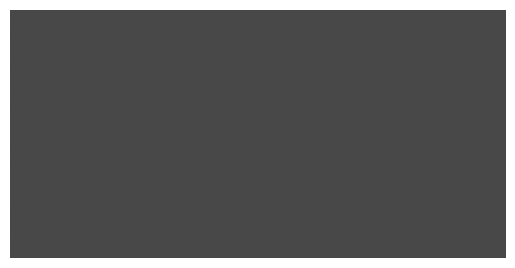

In [7]:
# Create an image
img = np.ones((100, 200, 1), np.uint8)

print(img)

# Change the intensity to 100
img = img * 100

# Display the image
plt.imshow(img, cmap='gray', vmin=0, vmax=355) # when displaying grayscale images, use cmap="gray" and define the range of values [vmin, vmax]
plt.axis("off")

cv2.imshow("grayscale example", img)
cv2.waitKey(0)
cv2.destroyWindow("grayscale example")

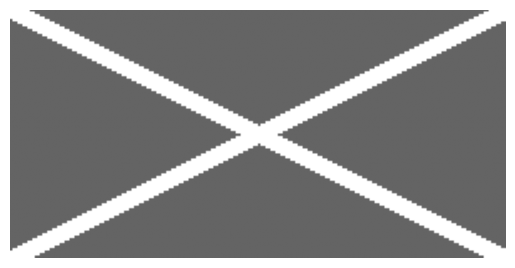

In [8]:
# Draw a line with thickness of 5 px
cv2.line(img, (0, 0), (200, 100), 255, 5)
cv2.line(img, (200, 0), (0, 100), 255, 5)

# Display image
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis("off")

# Display image using opencv
cv2.imshow("grayscale example", img)
cv2.waitKey(0)
cv2.destroyWindow("grayscale example")

Exercise 1.1 - Create a color image with 400 (rows) x 300 (columns) pixels in yellow. Then, draw two diagonal lines across the image, such that one is red, and the other one blue.

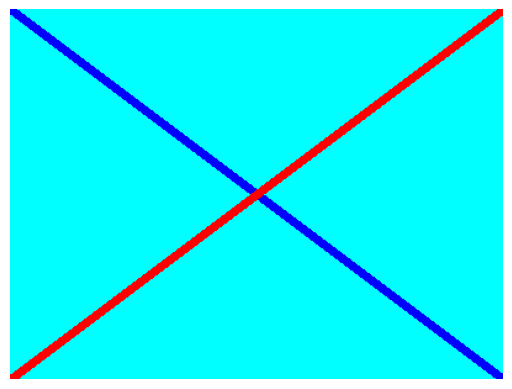

In [9]:
img = np.ones((300, 400, 3), np.uint8)

# Plot uses RGB order If using the plot
# img[:,:, 0:2] *= 255 

# Open CV2 uses BGR order
img[:,:,:] = [0,255,255]
  
cv2.line(img, (0, 0), (400, 300), (0,0,255), 5)
cv2.line(img, (400, 0), (0, 300), (255,0,0), 5) 

# Display image using matplotlib
plt.imshow(img) # when displaying colored images, we do not need to define cmap="gray"
plt.axis("off")


# Display image using opencv
cv2.imshow("yellow image example", img)
cv2.waitKey(0)
cv2.destroyWindow("yellow image example")

The results displayed by matplotlib and opencv are different since openCV interprets images in the BGR color space, while matplotlib interprets the image in the RGB color space.

Exercise 1.2 - Convert the image from BGR to RGB so that the image appears yellow on matplotlib.

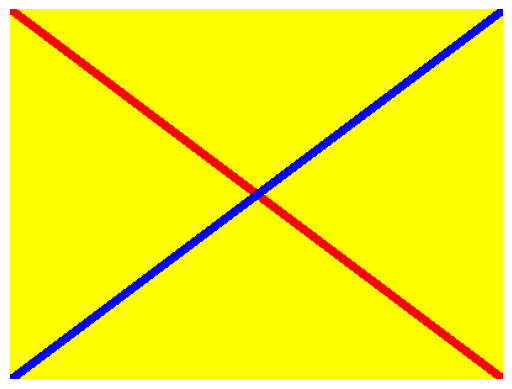

In [10]:
altered_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display image using matplotlib
plt.imshow(altered_img)
ax = plt.axis("off")

Exercise 1.3 - Read any color image, in BGR format, display it in one window, convert it to grayscale, display the grayscale image in another window and save the grayscale image to a different file.

True

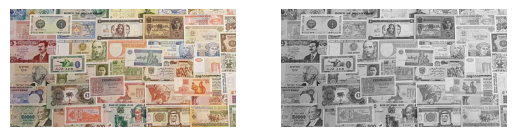

In [11]:
# Open image
bgr_img = cv2.imread(os.path.join(dataDir, "bank_notes_1.JPG"))

# Convert image into grayscale and show it in a different window
grayscale_img = cv2.cvtColor(bgr_img , cv2.COLOR_BGR2GRAY)

# Display two images in two separate windows using opencv

cv2.imshow("color image", bgr_img)
cv2.imshow("gray image", grayscale_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Display two images side by side using matplotlib (remember that matplotlib uses the RGB color space instead of BGR)
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(rgb_img)
axarr[1].imshow(grayscale_img, cmap="gray", vmin=0, vmax=255)
axarr[0].axis("off")
axarr[1].axis("off")

# Save grayscale image
cv2.imwrite("gray-scale-ex3.jpg", grayscale_img )

Exercise 1.4 - Split the 3 RGB channels and show each channel in a separate window. Add a constant value to one of the channels, merge the channels into a new color image and show the resulting image.

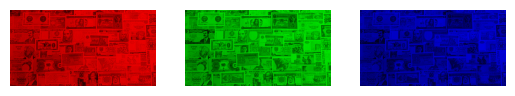

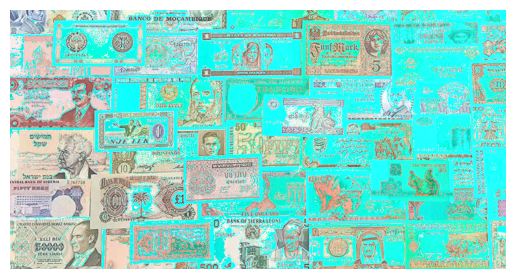

In [12]:
# Open image
bgr_img = cv2.imread(os.path.join(dataDir, "bank_notes_1.JPG"))

bgr_img_red = bgr_img.copy()

bgr_img_red[:, :, 0:2] = 0

bgr_img_green = bgr_img.copy()

bgr_img_green[:, :, [0,2]] = 0

bgr_img_blue = bgr_img.copy()

bgr_img_blue[:, :, 1:3] = 0

cv2.imshow("red channel", bgr_img_red)
cv2.imshow("green channel", bgr_img_green)
cv2.imshow("blue channel", bgr_img_blue)

cv2.waitKey(0)
cv2.destroyAllWindows()


# Display two images side by side using matplotlib (remember that matplotlib uses the RGB color space instead of BGR)
rgb_red = cv2.cvtColor(bgr_img_red, cv2.COLOR_BGR2RGB)
rgb_green = cv2.cvtColor(bgr_img_green, cv2.COLOR_BGR2RGB)
rgb_blue = cv2.cvtColor(bgr_img_blue, cv2.COLOR_BGR2RGB)

f, axarr = plt.subplots(1,3)
axarr[0].imshow(rgb_red)
axarr[1].imshow(rgb_green)
axarr[2].imshow(rgb_blue)
axarr[0].axis("off")
axarr[1].axis("off")
axarr[2].axis("off")
plt.show()

bgr_img_red += 60 

final_img = cv2.add(bgr_img_red, cv2.add(bgr_img_green, bgr_img_blue))

cv2.imshow("final image", final_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

final_img_rgb = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
plt.imshow(final_img_rgb)
plt.axis("off") 
plt.show()



Exercise 1.5 - Convert the image to HSV, split the 3 HSV channels and show each channel in a separate window. Add a constant value to the saturation channel, merge the channels into a new color image and show the resulting image.

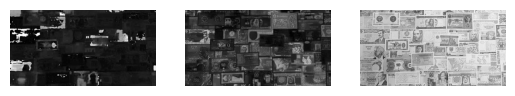

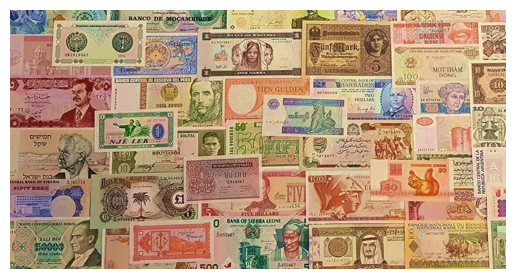

In [13]:
bgr_img = cv2.imread(os.path.join(dataDir, "bank_notes_1.JPG"))


hsv_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV)

hue , saturation, vue = cv2.split(hsv_img)

cv2.imshow("hue view",hue)
cv2.imshow("saturation view",saturation)
cv2.imshow("vue view",vue)
cv2.waitKey(0)
cv2.destroyAllWindows()


f, axarr = plt.subplots(1,3)
axarr[0].imshow(hue, cmap="gray")
axarr[1].imshow(saturation, cmap="gray")
axarr[2].imshow(vue, cmap="gray")
axarr[0].axis("off")
axarr[1].axis("off")
axarr[2].axis("off")
plt.show()


final_img = hsv_img.copy()
final_img[:,:,1] +=40

final_img_bgr = cv2.cvtColor(final_img, cv2.COLOR_HSV2BGR)

cv2.imshow("hue summed image", final_img_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

final_img_rgb = cv2.cvtColor(final_img, cv2.COLOR_HSV2RGB)

plt.imshow(final_img_rgb)
plt.axis("off")
plt.show()



### 2. OpenCV Interactive Interface

Exercise 2.1 - Open an image on a new window. When the user moves the mouse, print the coordinates and BGR component of the pixel under the cursor. When the user clicks on a pixel, modify that pixel to blue.

In [14]:
# TODO

Exercise 2.2 - Allow the user to select a region of interest (ROI) in the image, by clicking on two points that identify two opposite corners of the selected ROI, and save the ROI into another file.

In [15]:
# TODO

### 3. Video – acquisition and simple processing

In [16]:
# Define a VideoCapture Object
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()

frame_nr = 0
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # If frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # Display the resulting frame
    cv2.imshow('webcam', frame)

    # Wait for user to press s to save frame
    if cv2.waitKey(1) == ord('s'):
        frame_name = 'frame' + str(frame_nr) + '.png'
        cv2.imwrite(frame_name, frame)
        cv2.imshow("Saved frame: " + frame_name, frame)
        cv2.waitKey(0)
        cv2.destroyWindow("Saved frame: " + frame_name)

    # Wait for user to press q to quit
    if cv2.waitKey(1) == ord('q'):
        break

    frame_nr += 1

# When everything is done, release the capture
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

Exercise 3.1 - Using the previous example as the baseline, implement a script that acquires the video from the webcam, converts it to grayscale, and shows the frames in binary format (i.e. the intensity of each pixel is 0 or 255); use a threshold value of 128.

In [ ]:
# TODO

Exercise 3.2 - Implement a simple detection/tracking algorithm for colored objects, using the following steps:
1. take each frame of the video;
2. convert from BGR to HSV color-space;
3. threshold the HSV image for a range of color values (creating a binary mask);
4. erase everything in the original image except the mask.

In [ ]:
# TODO